In [2]:
import pandas as pd

In [5]:
vaccine = pd.read_csv("../data/Australia/au_covid_vaccine.csv")
vaccine.drop(columns = ["Datetime", "Username", "Tweet Id"], inplace = True)
vaccine

,Text
0,What You Need to Know\n- New variants of the v...
1,@robert_dessoye @CDCgov Front line workers don...
2,@IanLinklater5 I am not scared! I know higher ...
3,@PvtGen0 Yay! 🐔🪚➡️🥣
4,Police are warning Canberrans that anti-vaccin...
...,...
47777,@ProfKatieEwer @WEHI_research Thanks Katie 🥰 h...
47778,Discussing the importance of building dialogue...
47779,@Mikespins My biggest concern is that the next...
47780,And then be vigilant for the side effects due ...


In [6]:
vaccination = pd.read_csv("../data/Australia/au_covid_vaccination.csv")
vaccination.drop(columns = ["Datetime", "Username", "Tweet Id"], inplace = True)
vaccination

,Text
0,Another scrupulously balanced thread on Covid ...
1,@MikeCarlton01 This nurse needs to read AHPRAs...
2,Victoria decriminalises the sex industry.\nCan...
3,@DamoMK @FreoPope @ReeceJHarley Given vaccinat...
4,@X_Durham_lass Yes I have. I want a targeted o...
...,...
15837,"After UK, Australians could get the Covid vacc..."
15838,Wow #vaccination against #covid19 as early as ...
15839,@oslersweb Wouldn't mandatory vaccination be a...
15840,@drnickgreiner Certificate \nOf\nVaccination \...


In [7]:
frames = [vaccination, vaccine]

result = pd.concat(frames)

In [8]:
result

,Text
0,Another scrupulously balanced thread on Covid ...
1,@MikeCarlton01 This nurse needs to read AHPRAs...
2,Victoria decriminalises the sex industry.\nCan...
3,@DamoMK @FreoPope @ReeceJHarley Given vaccinat...
4,@X_Durham_lass Yes I have. I want a targeted o...
...,...
47777,@ProfKatieEwer @WEHI_research Thanks Katie 🥰 h...
47778,Discussing the importance of building dialogue...
47779,@Mikespins My biggest concern is that the next...
47780,And then be vigilant for the side effects due ...


In [9]:
tweet_text_list = result['Text'].tolist()

tweet_text_list

['Another scrupulously balanced thread on Covid deaths from Michael. Omicron’s not mild, but deaths lower than many expected/predicted &amp; overall 🇦🇺 has avoided much larger mortality burden, through vaccination &amp; other strategies. https://t.co/BIdPvoLMkp',
 '@MikeCarlton01 This nurse needs to read AHPRAs Statement on Vaccination and their Social Media Policy and then get the hell off social media',
 "Victoria decriminalises the sex industry.\nCan Fiona Patten advise the community what the vaccination requirements are for 'her' girls &amp; what oversighting is in place to ensure they are ?",
 '@DamoMK @FreoPope @ReeceJHarley Given vaccination rates are high, booster adoption at this stage looks positive towards high rates, the natural immunity in community due to infection and more importantly the less severity in the virus due to all of the above, mandates should be removed but for high risk areas.',
 "@X_Durham_lass Yes I have. I want a targeted omicron shot, not just more of t

In [12]:
import numpy as np
import re

In [16]:
stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from", "vaccine", "covid", "vaccines","australia", "vaccinated","vaccination","amp", "will"]

def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stopwords]
    temp = " ".join(word for word in temp)
    return temp

In [17]:
cleaned_tweets = [clean_tweet(tw) for tw in tweet_text_list]
cleaned_tweets

<ipython-input-16-73d4ba79bb25>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


['another scrupulously balanced thread deaths michael omicron s not mild but deaths lower than many expected predicted overall has avoided much larger mortality burden through other strategies',
 'this nurse needs read ahpras statement their social media policy then get hell off social media',
 'victoria decriminalises sex industry can fiona patten advise community what requirements are her girls what oversighting is place ensure they are',
 'given rates are high booster adoption at this stage looks positive towards high rates natural immunity community due infection more importantly less severity virus due all above mandates should be removed but high risk areas',
 'yes i have i want targeted omicron shot not just more same i had december what happens after 3rd shot 4th 5th our immune systems arent designed keep getting boosters every 3 months our immune systems are delicate balanced',
 'has no impact seems obvious that uptake virus undoubtedly occurs more easily our now heavily popul

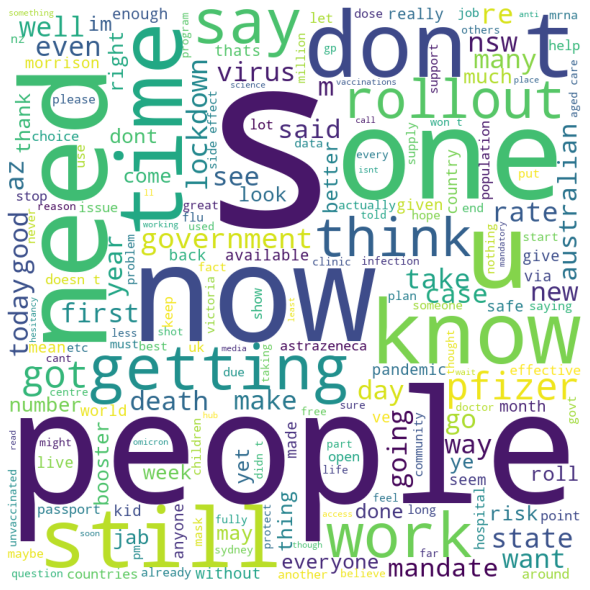

In [18]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''

# iterate through list
for tweet_text in cleaned_tweets:
    # split the text into tokens
    tokens = tweet_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "
    
# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()